In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

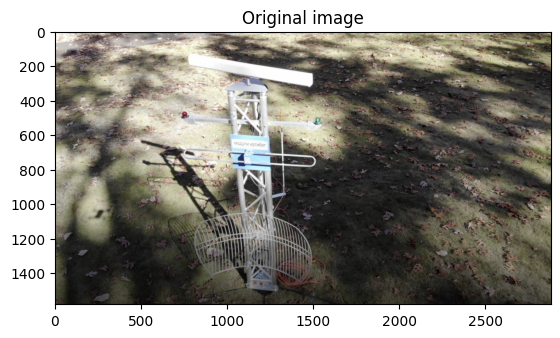

In [29]:
#import and show image
image = cv.imread("mast_frame.png")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image)
plt.title('Original image')
plt.show()

image = cv.cvtColor(image,cv.COLOR_RGB2BGR)

# cv.imshow("test",image)
# cv.waitKey(0)
# cv.destroyAllWindows()


The corner points are...

A : [1077, 715]
B : [1172, 546]
C : [1324, 724]
D : [1534, 11]


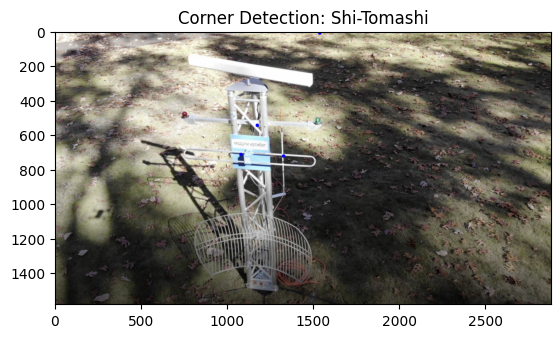

In [32]:
#testing shi_tomasi
gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
# blur = cv.GaussianBlur(gray,(5,5),0)
blur = cv.bilateralFilter(gray,9,75,75)
corners = cv.goodFeaturesToTrack(blur, 4, 0.01, 100)
corners = np.int0(corners)
corners = sorted(np.concatenate(corners).tolist())
print('\nThe corner points are...\n')

im = image.copy()
for index, c in enumerate(corners):
    x, y = c
    cv.circle(im, (x, y), 10, (255,0,0), -1)
    character = chr(65 + index)
    print(character, ':', c)
#     cv.putText(im, character, tuple(c), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2, cv.LINE_AA)

plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
plt.title('Corner Detection: Shi-Tomashi')
plt.show()


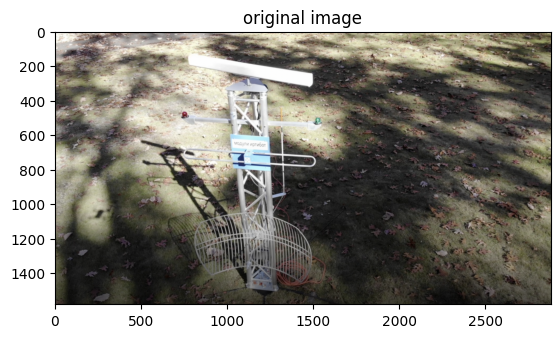

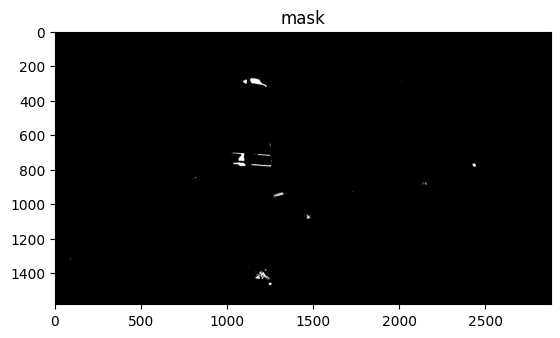

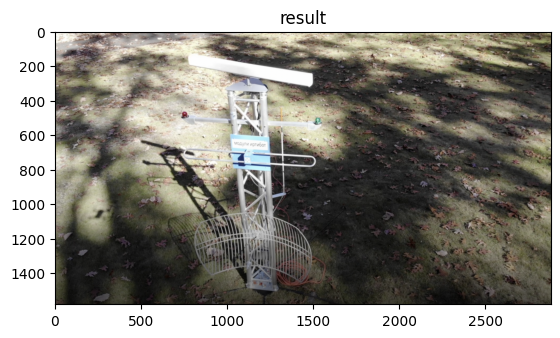

In [33]:
#color filter
hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
     
# Threshold of blue in HSV space
# lower_blue = np.array([60, 35, 140])
# upper_blue = np.array([180, 255, 255])
lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])
 
# preparing the mask to overlay
mask = cv.inRange(hsv, lower_blue, upper_blue)
# mask = cv.cvtColor(image.)

# The black region in the mask has the value of 0,
# so when multiplied with original image removes all non-blue regions
result = cv.bitwise_and(image, image, mask = mask)

# mask = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

result = cv.cvtColor(image, cv.COLOR_BGR2RGB)
# result = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# result = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# plt.subplot(311)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title("original image")
plt.show()

# plt.subplot(312)
plt.imshow(mask, cmap="gray")
plt.title("mask")
plt.show()

# plt.subplot(313)
plt.imshow(result)
plt.title("result")
plt.show()

# cv.imshow('result',result)
